In [15]:
import pandas as pd
import numpy as np
from pygenesis.py_genesis_client import PyGenesisClient
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#Verbinden mit dem Genisis Server und laden der Daten
client = PyGenesisClient(site='DESTATIS', username='DEHFMC984H', password='m\8+iAN&8}9rjj\#')
client.download_csv('12613-0002', 'data.csv')
raw_data_df = client.read('12613-0002')
test_df = client.read('12613-0002')
test_df.head()

,index.0,männlich,weiblich,Insgesamt
0,1950,375323.0,373006.0,748329.0
1,1951,380155.0,372542.0,752697.0
2,1952,387003.0,380636.0,767639.0
3,1953,400373.0,390281.0,790654.0
4,1954,392610.0,382681.0,775291.0


In [17]:
#Aendern der Daten von String in int fuer das anwenden von query
raw_data_df = raw_data_df.astype({'index.0':'int'})
#Umbenenen der Zeilennamen
df = raw_data_df.rename(columns={'index.0': "jahre"}, errors="raise")
#Zeitraum auswaehlen
df = df.query("jahre >= 1990")
df = df.set_index('jahre')
df.head()


,männlich,weiblich,Insgesamt
jahre,,,
1990,425093.0,496352.0,921445.0
1991,421818.0,489427.0,911245.0
1992,410583.0,474860.0,885443.0
1993,415874.0,481396.0,897270.0
1994,409375.0,475286.0,884661.0


(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

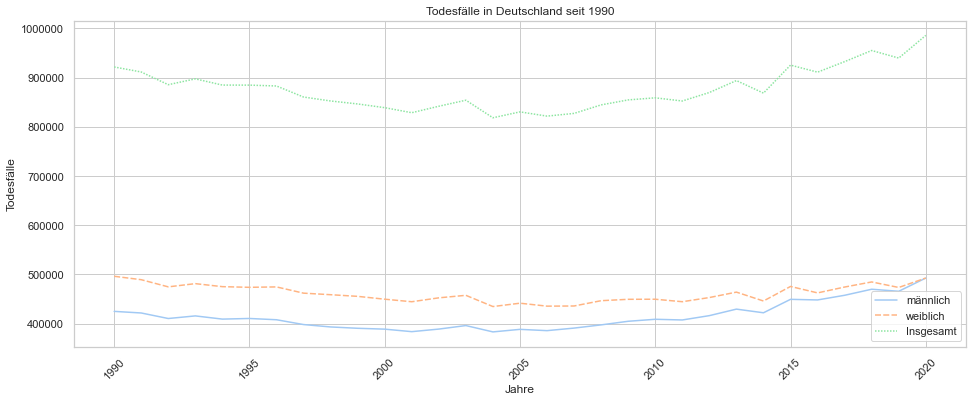

In [30]:
#Visualisierung
plt.rcParams.update({'font.size': 22})
ticks = [400000, 500000, 600000, 700000, 800000, 900000, 1000000]

plt.figure(figsize=(16,6))
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.lineplot(data=df)

g.set_yticks(ticks)
g.set_yticklabels(ticks)
g.set_title("Todesfälle in Deutschland seit 1990")
g.set(xlabel="Jahre", ylabel="Todesfälle")
plt.xticks(rotation=45)
